<h2 style = "color : Brown"> Lending Club Case Study </h2>

In [612]:
#Python libraries import
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


In [613]:
#Load csv file of loan dataset
df_orig = pd.read_csv('loan.csv',dtype={"last_pymnt_amnt": np.float32}) #"last_pymnt_amnt": np.float32 avoid low memory error

In [614]:
#Read the first five rows
df_orig.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [615]:
# Read data frame size
df_orig.shape


(39717, 111)

####  Datatype and null values identification
- Check the datatypes of all the columns of the dataframe.
- And also the number of null values in the columns. 

In [616]:

df_orig.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

#### Removal of columns with Null values and other irelevant data


In [617]:
# Find and remove column null values equal to total row count
s_null_df=df_orig.isin([0,'',np.nan]).sum()
total_row_count = df_orig.shape[0] # 39717
null_columns = []
for index, value in s_null_df.items():
    if value == total_row_count:
        null_columns.append(index)
null_columns

['collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',

In [618]:
loan_df_1 = df_orig.drop(null_columns, axis = 1)
loan_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [619]:
loan_df_1.shape


(39717, 52)

### Removal of Customer behaviour variables
The customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.


In [620]:
#Remove customer behaviour variables 
customer_behaviour_variables=['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']
customer_behaviour_variables
loan_df_2 = loan_df_1.drop(customer_behaviour_variables, axis = 1)
loan_df_2.shape

(39717, 31)

In [621]:
loan_df_2.isin([0,'',np.nan]).sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv             129
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
desc                      12940
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                         183
mths_since_last_delinq    26125
mths_since_last_record    37601
initial_list_status           0
next_pymnt_d              38577
policy_code                   0
pub_rec_bankruptcies      38036
dtype: i

In [622]:
# Remove all columns  with very high missing percentage
s_null = loan_df_2.isin([0,'',np.nan]).sum() * 100 / len(loan_df_2)
null_columns = []
for index, value in s_null.items():
    print(index, value)
    if value > 60:
        null_columns.append(index)
null_columns


id 0.0
member_id 0.0
loan_amnt 0.0
funded_amnt 0.0
funded_amnt_inv 0.3247979454641589
term 0.0
int_rate 0.0
installment 0.0
grade 0.0
sub_grade 0.0
emp_title 6.191303472064859
emp_length 2.7066495455346575
home_ownership 0.0
annual_inc 0.0
verification_status 0.0
issue_d 0.0
loan_status 0.0
pymnt_plan 0.0
url 0.0
desc 32.58050708764509
purpose 0.0
title 0.027695948838029054
zip_code 0.0
addr_state 0.0
dti 0.4607598761235743
mths_since_last_delinq 65.77787849031901
mths_since_last_record 94.6723065689755
initial_list_status 0.0
next_pymnt_d 97.1296925749679
policy_code 0.0
pub_rec_bankruptcies 95.76755545484302


['mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'pub_rec_bankruptcies']

In [623]:
loan_df_3 = loan_df_2.drop(null_columns, axis = 1)
loan_df_3.shape

(39717, 27)

In [624]:
loan_df_3.isin([0,'',np.nan]).sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv          129
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
desc                   12940
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                      183
initial_list_status        0
policy_code                0
dtype: int64

#### Further removal of  irrelevant columns 
These column are having single unique values or are irelevant for our analysis

In [625]:
loan_df_3['policy_code'].describe() #unique and irrelevant
loan_df_3['pymnt_plan'].describe() #unique and irrelevant
loan_df_3['initial_list_status'].describe() #irrelevant
# loan_df_3['emp_title'].describe()  
colns_to_drop = ['policy_code','initial_list_status','url','zip_code','desc','pymnt_plan'] #


In [626]:
loan_df_4 = loan_df_3.drop(colns_to_drop, axis = 1)
loan_df_4.shape

(39717, 21)

In [627]:
loan_df_4.isin([0,'',np.nan]).sum()

id                        0
member_id                 0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv         129
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title              2459
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
title                    11
addr_state                0
dti                     183
dtype: int64

In [628]:
loan_df_3['emp_title'].describe()

count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object

In [629]:
loan_df_3['emp_title'].value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

### Remove rows with Current loan status
The loans marked 'current' are neither fully paid not defaulted , hence will be excluded.

In [630]:
#Remove rows with Current loan status
loan_df_6 = loan_df_4[(loan_df_4.loan_status != 'Current')]

print(loan_df_4.shape)
print(loan_df_6.shape)
print(loan_df_6.head())

(39717, 21)
(38577, 21)
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
5  1075269    1311441       5000         5000           5000.0   36 months   

  int_rate  installment grade sub_grade  ... emp_length home_ownership  \
0   10.65%       162.87     B        B2  ...  10+ years           RENT   
1   15.27%        59.83     C        C4  ...   < 1 year           RENT   
2   15.96%        84.33     C        C5  ...  10+ years           RENT   
3   13.49%       339.31     C        C1  ...  10+ years           RENT   
5    7.90%       156.46     A        A4  ...    3 years           RENT   

  annual_inc  verification_status issue_d  loan_status        

#### Format Intrest Rate column and Term column 

In [631]:
loan_df_7 = loan_df_6
loan_df_7['int_rate'] = loan_df_7['int_rate'].apply(lambda x: x.strip('%'))
loan_df_7['term'] = loan_df_7['term'].str.strip('months').astype('int')
loan_df_7.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38577 non-null  int64  
 1   member_id            38577 non-null  int64  
 2   loan_amnt            38577 non-null  int64  
 3   funded_amnt          38577 non-null  int64  
 4   funded_amnt_inv      38577 non-null  float64
 5   term                 38577 non-null  int32  
 6   int_rate             38577 non-null  object 
 7   installment          38577 non-null  float64
 8   grade                38577 non-null  object 
 9   sub_grade            38577 non-null  object 
 10  emp_title            36191 non-null  object 
 11  emp_length           37544 non-null  object 
 12  home_ownership       38577 non-null  object 
 13  annual_inc           38577 non-null  float64
 14  verification_status  38577 non-null  object 
 15  issue_d              38577 non-null 

In [632]:
#Employee Length has nulls which needs to be acted upon.

loan_df_3.emp_length.isin([0,'',np.nan]).sum()

1075

In [633]:
loan_df_3.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [634]:
loan_df_3.emp_length.describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [635]:
# Since nulll as less , 1075 , will fill with the largest occurance emp_length

loan_df_3.emp_length.fillna('10+ years',inplace=True)


In [636]:
loan_df_3.emp_length.isin([0,'',np.nan]).sum()

0

#### Changing Loan Status value from text to Boolean values for better analysis

In [637]:

loan_df_7.loan_status = loan_df_7.loan_status.apply(lambda x : 0 if x == 'Fully Paid' else ( 1 if x == 'Charged Off' else x) )
loan_df_7.loan_status
loan_df_7.to_csv('loan_df_7.csv')




In [638]:
# Create two dataframes for Paid and Default
df_both = loan_df_7
df_paid = loan_df_7[loan_df_7.loan_status == 0]
df_chargedoff = loan_df_7[loan_df_7.loan_status == 1]

In [639]:
df_both[['issue_d']] = df_both[['issue_d']].apply(pd.to_datetime,format='%b-%y')
df_both
df_both['issue_yr'] = pd.DatetimeIndex(df_both['issue_d']).year
df_both['issue_mn'] = pd.DatetimeIndex(df_both['issue_d']).month

print(df_both.shape)
print(df_paid.shape)
print(df_chargedoff.shape)
df_both.info()

(38577, 23)
(32950, 21)
(5627, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   38577 non-null  int64         
 1   member_id            38577 non-null  int64         
 2   loan_amnt            38577 non-null  int64         
 3   funded_amnt          38577 non-null  int64         
 4   funded_amnt_inv      38577 non-null  float64       
 5   term                 38577 non-null  int32         
 6   int_rate             38577 non-null  object        
 7   installment          38577 non-null  float64       
 8   grade                38577 non-null  object        
 9   sub_grade            38577 non-null  object        
 10  emp_title            36191 non-null  object        
 11  emp_length           37544 non-null  object        
 12  home_ownership       38577 non-null  object        
 

In [640]:
df1=df_paid[['grade','loan_status']].groupby('grade').agg(['count'])
df1.columns = ['fullypaid_count']


print(df1.index)
df1['grade'] = df1.index

df1.info()
df1

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object', name='grade')
<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, A to G
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   fullypaid_count  7 non-null      int64 
 1   grade            7 non-null      object
dtypes: int64(1), object(1)
memory usage: 168.0+ bytes


,fullypaid_count,grade
grade,,
A,9443,A
B,10250,B
C,6487,C
D,3967,D
E,1948,E
F,657,F
G,198,G


### Univariate Analysis
Frequency Distribution of Grade of the Customer

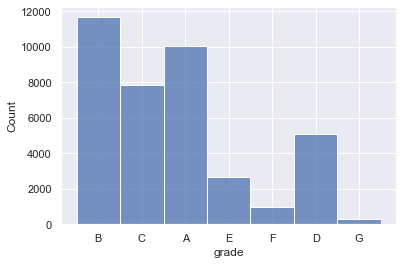

In [641]:
# Histogram analysis of Grade

loan_df_7.grade.describe()
sns.set(style="darkgrid")

sns.histplot(loan_df_7['grade'])
plt.show()

#Finding : Maximum applicants have Grade B

The histogram show Grade A.B,C form the  no of highest applicants


#### Frequency distribution of loan amount

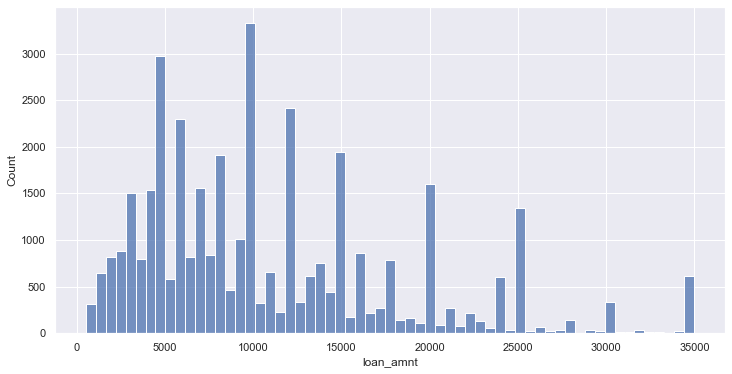

In [642]:
# Histogram analysis of Grade
plt.figure(figsize=(12,6))

loan_df_7.grade.describe()
sns.set(style="darkgrid")

sns.histplot(loan_df_7['loan_amnt'])
plt.show()

#Finding : Maximum applicants have Grade B

Loan amout of 10000 seems to be most applied for


#### Frequency distribution of intrest rate

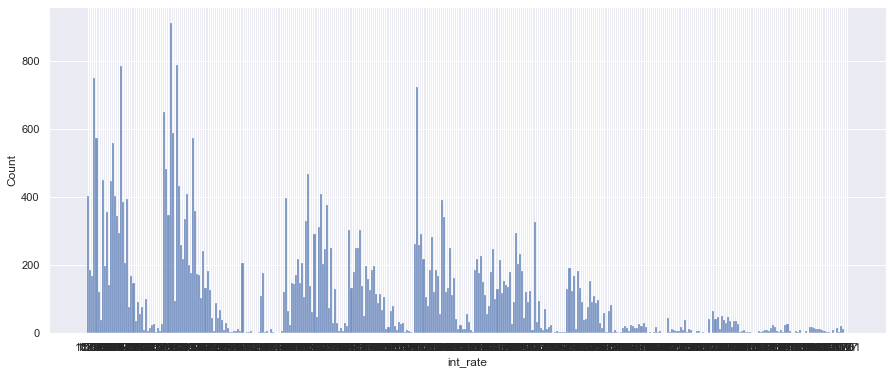

In [643]:
# Histogram analysis of Grade
plt.figure(figsize=(15,6))

loan_df_7.grade.describe()
sns.set(style="darkgrid")

sns.histplot(loan_df_7['int_rate'])
plt.show()

#Finding : Maximum applicants have Grade B

For intrest rate , the value of 10.0 to 15.0 seems to be popular , apart from 7.5


#### Frequency distribution of Sub Grade

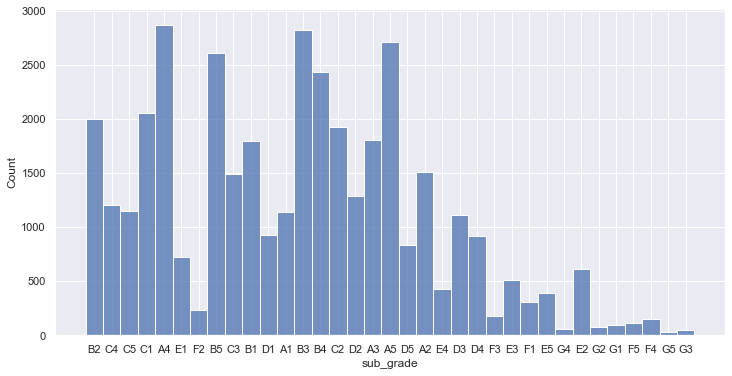

In [644]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))

sns.histplot(loan_df_7['sub_grade'])

plt.show()

Sub Grade of A,B,C seems to be more frequent


#### Frequency distribution of Employement Length 

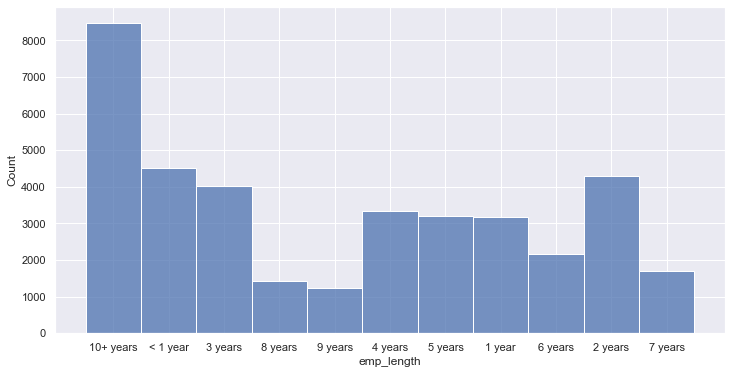

count         37544
unique           11
top       10+ years
freq           8488
Name: emp_length, dtype: object

In [645]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))


sns.histplot(loan_df_7['emp_length'],kde = False)


plt.show()
loan_df_7.emp_length.describe()


Most of the applicants seems to be from the Employment term of 10+ Years.

In [646]:
df2=df_chargedoff[['grade','loan_status']].groupby('grade').agg(['count'])
df2.columns = ['chargedoff_count']
df2.info()

print(df2.index)
df2['grade2'] = df2.index

df2.info()
df2

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, A to G
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   chargedoff_count  7 non-null      int64
dtypes: int64(1)
memory usage: 112.0+ bytes
Index(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object', name='grade')
<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, A to G
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   chargedoff_count  7 non-null      int64 
 1   grade2            7 non-null      object
dtypes: int64(1), object(1)
memory usage: 168.0+ bytes


,chargedoff_count,grade2
grade,,
A,602,A
B,1425,B
C,1347,C
D,1118,D
E,715,E
F,319,F
G,101,G


#### Analysis of Grade with Fully paid and Charged Off

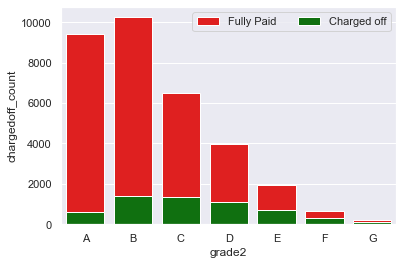

In [647]:
bar_plot1 = sns.barplot(x='grade', y='fullypaid_count',data=df1, label="Fully Paid", color="red")
bar_plot2 = sns.barplot(x='grade2', y='chargedoff_count', data=df2, label="Charged off", color="green")

plt.legend(ncol=2, loc="upper right", frameon=True)
plt.show()

In [648]:
 
result = pd.concat([df1, df2], axis=1, join='inner')
display(result)

,fullypaid_count,grade,chargedoff_count,grade2
grade,,,,
A,9443,A,602,A
B,10250,B,1425,B
C,6487,C,1347,C
D,3967,D,1118,D
E,1948,E,715,E
F,657,F,319,F
G,198,G,101,G


In [649]:
result['per'] = (result['chargedoff_count']/(result['fullypaid_count'] + result['chargedoff_count']))*100
result


,fullypaid_count,grade,chargedoff_count,grade2,per
grade,,,,,
A,9443,A,602,A,5.993031
B,10250,B,1425,B,12.205567
C,6487,C,1347,C,17.194281
D,3967,D,1118,D,21.986234
E,1948,E,715,E,26.849418
F,657,F,319,F,32.684426
G,198,G,101,G,33.779264


### Segmented Analysis

#### Default rate versus Grade

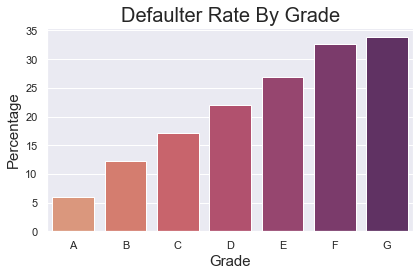

In [650]:
df_grade_pv = pd.pivot_table(data=df_both,index=["grade"],values=["loan_status"],aggfunc=[np.mean])
df_grade_pv.reset_index(inplace=True)  
df_grade_pv["per"]= df_grade_pv.iloc[:, 1]*100


sns.barplot(x= 'grade', y = 'per', data = df_grade_pv, palette="flare" )

#set labels
plt.xlabel("Grade", size=15)
plt.ylabel("Percentage", size=15)
plt.title("Defaulter Rate By Grade", size=20)
plt.tight_layout()
plt.show()

**Note** : Grade D,E,F,G seems to be the ones with highest defaut rate

#### Default rate versus Sub Grade

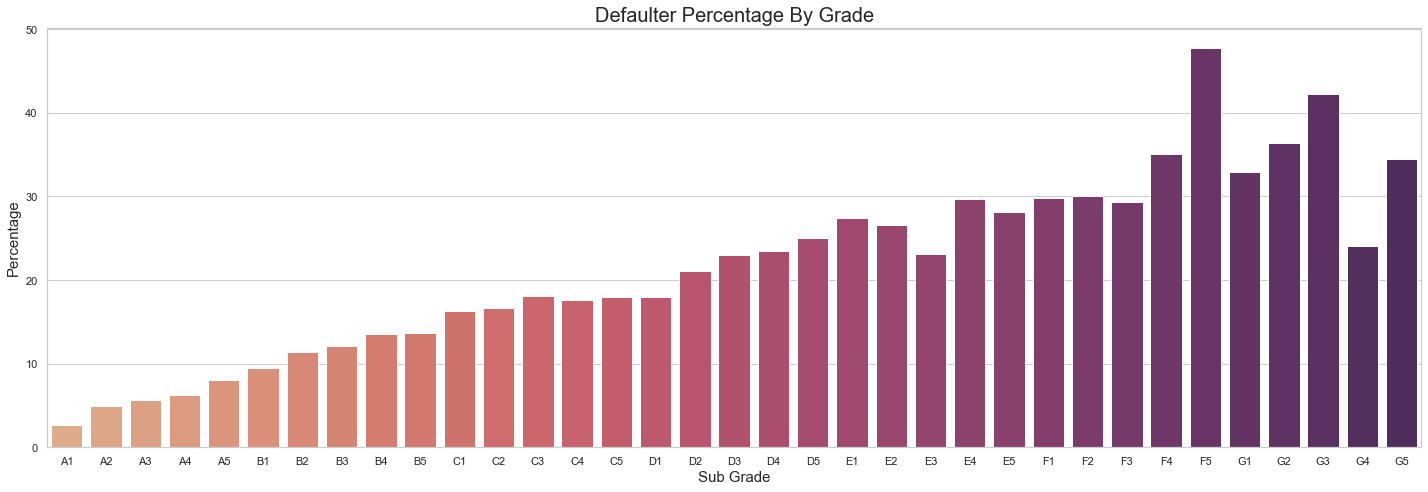

In [651]:

df_subgrade_pv = pd.pivot_table(data=df_both,index=["sub_grade"],values=["loan_status"],aggfunc=[np.mean])
df_subgrade_pv.reset_index(inplace=True)  
df_subgrade_pv["per"]= df_subgrade_pv.iloc[:, 1]*100

plt.figure(figsize=(20,7))
sns.set(style="whitegrid")
sns.barplot(x= 'sub_grade', y = 'per', data = df_subgrade_pv, palette="flare" )

#set labels
plt.xlabel("Sub Grade", size=15)
plt.ylabel("Percentage", size=15)
plt.title("Defaulter Percentage By Grade", size=20)
plt.tight_layout()
plt.show()

**Note** : SubGrade D*,E*,F*,G* seems to be the ones with highest defaut rate

#### Default rate versus Term of Loan

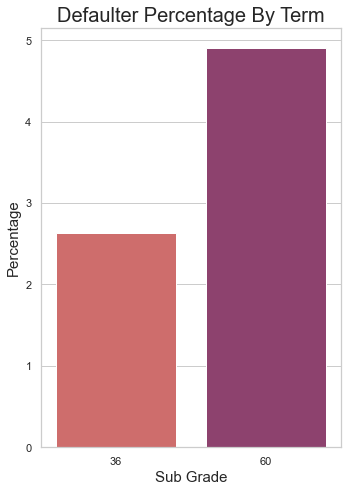

In [652]:
df_term_pv = pd.pivot_table(data=df_both,index=["term"],values=["loan_status"],aggfunc=[np.mean])
df_term_pv.reset_index(inplace=True)  
df_term_pv["per"]= df_subgrade_pv.iloc[:, 1]*100

plt.figure(figsize=(5,7))
sns.set(style="whitegrid")
sns.barplot(x="term", y ="per", data = df_term_pv, palette="flare" )

#set labels
plt.xlabel("Sub Grade", size=15)
plt.ylabel("Percentage", size=15)
plt.title("Defaulter Percentage By Term", size=20)
plt.tight_layout()
plt.show()

#### Default Rate versus Home Ownership type

**Note** : Applicants of loan with term of 60 , seems to be one who will default the most

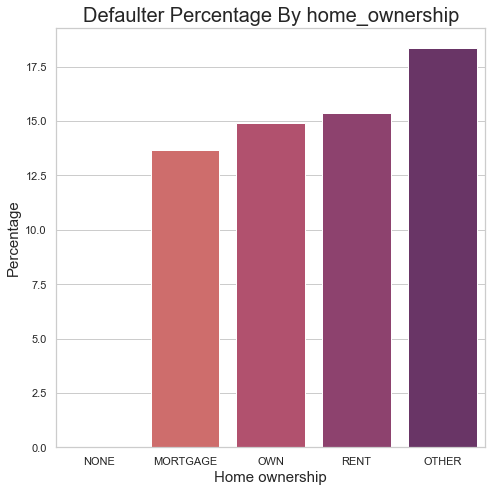

In [653]:

df_home_ownership_pv = pd.pivot_table(data=df_both,index=["home_ownership"],values=["loan_status"],aggfunc=[np.mean])
df_home_ownership_pv.reset_index(inplace=True)  
df_home_ownership_pv["per"]= df_home_ownership_pv.iloc[:, 1]*100
df_home_ownership_pv.sort_values(by=['per'], inplace=True)

plt.figure(figsize=(7,7))
sns.set(style="whitegrid")
sns.barplot(x="home_ownership", y ="per", data = df_home_ownership_pv, palette="flare" )

#set labels
plt.xlabel("Home ownership", size=15)
plt.ylabel("Percentage", size=15)
plt.title("Defaulter Percentage By home_ownership", size=20)
plt.tight_layout()
plt.show()

#### Default Rate versus Purpose of loan

**Note** : Home ownership type of Other , seems to have highest default rate 

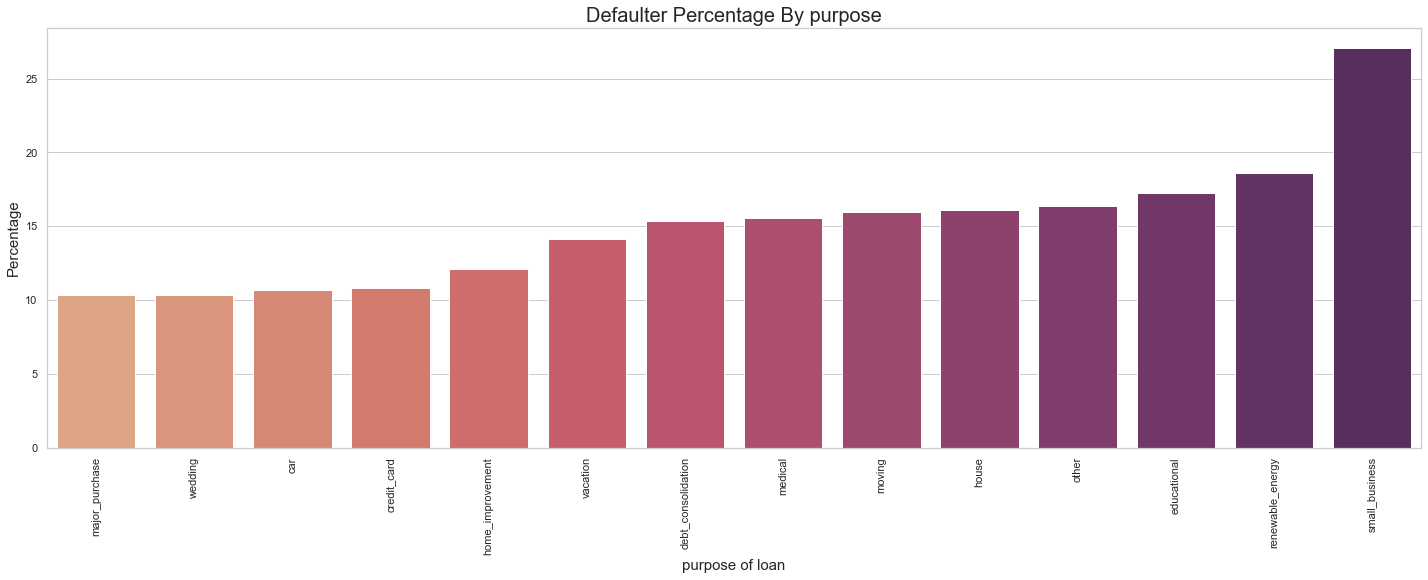

In [654]:
df_purpose_pv = pd.pivot_table(data=df_both,index=["purpose"],values=["loan_status"],aggfunc=[np.mean])
df_purpose_pv.reset_index(inplace=True)  
df_purpose_pv["per"]= df_purpose_pv.iloc[:, 1]*100
df_purpose_pv.sort_values(by=['per'], inplace=True)

plt.figure(figsize=(20,7))
sns.set(style="whitegrid")
ax = sns.barplot(x="purpose", y ="per", data = df_purpose_pv, palette="flare" ) #deep

#set labels
plt.xlabel("purpose of loan", size=15)
plt.ylabel("Percentage", size=15)
plt.title("Defaulter Percentage By purpose", size=20)
plt.tight_layout()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

**Note** : When purpose of loan is small bussiness , then that has high risk of defaulting.

#### Default Rate versus Employment length

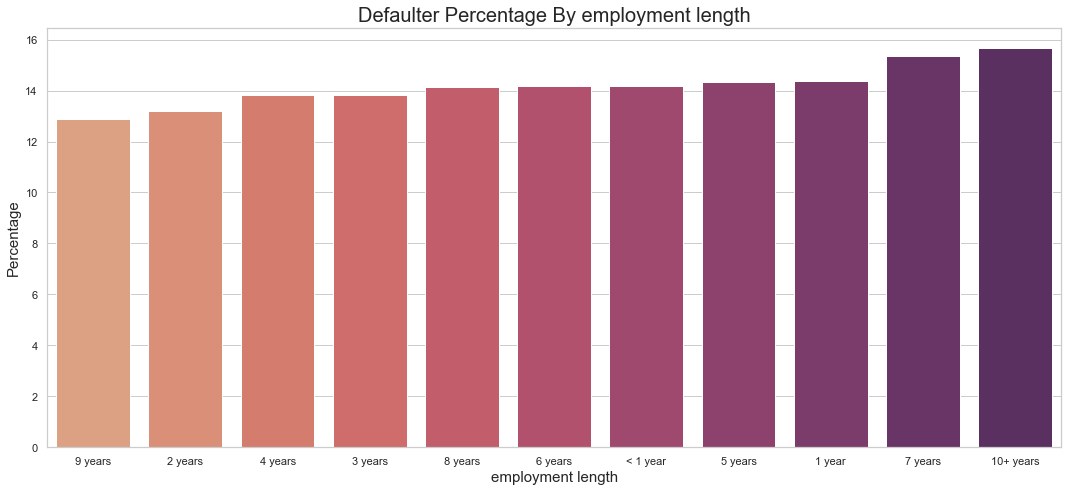

In [655]:
df_emp_length_pv = pd.pivot_table(data=df_both,index=["emp_length"],values=["loan_status"],aggfunc=[np.mean])
df_emp_length_pv.reset_index(inplace=True)  
df_emp_length_pv["per"]= df_emp_length_pv.iloc[:, 1]*100
df_emp_length_pv.sort_values(by=['per'], inplace=True)

plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
sns.barplot(x="emp_length", y ="per", data = df_emp_length_pv, palette="flare" )

#set labels
plt.xlabel("employment length", size=15)
plt.ylabel("Percentage", size=15)
plt.title("Defaulter Percentage By employment length", size=20)
plt.tight_layout()
plt.show()

**Note** : Applicants with employment of 10+ years has higher chances of defaulting

#### Default Rate versus Loan Issue Year

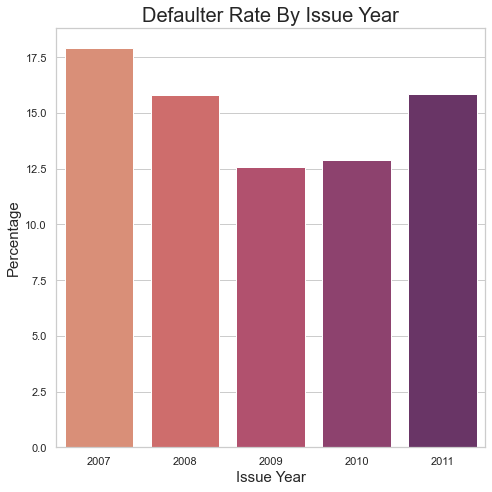

In [656]:
df_issue_yr_pv = pd.pivot_table(data=df_both,index=["issue_yr"],values=["loan_status"],aggfunc=[np.mean])
df_issue_yr_pv.reset_index(inplace=True)  
df_issue_yr_pv["per"]= df_issue_yr_pv.iloc[:, 1]*100
df_issue_yr_pv.sort_values(by=['per'], inplace=True)

plt.figure(figsize=(7,7))
sns.set(style="whitegrid")
sns.barplot(x="issue_yr", y ="per", data = df_issue_yr_pv, palette="flare" )

#set labels
plt.xlabel("Issue Year", size=15)
plt.ylabel("Percentage", size=15)
plt.title("Defaulter Rate By Issue Year", size=20)
plt.tight_layout()
plt.show()

#### Default Rate versus Loan Issue Month

**Note** : 2007 seems to be the rough year for the loan repayment

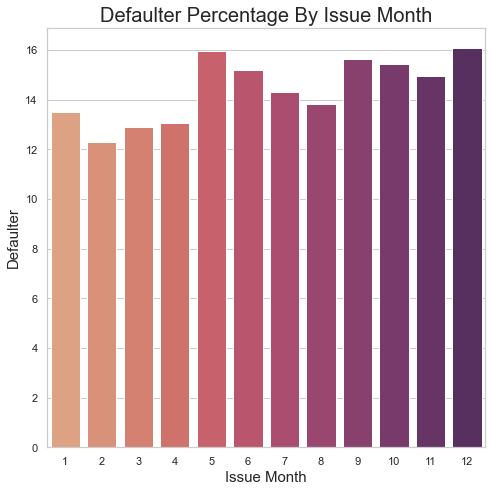

In [657]:

df_issue_mn_pv = pd.pivot_table(data=df_both,index=["issue_mn"],values=["loan_status"],aggfunc=[np.mean])
df_issue_mn_pv.reset_index(inplace=True)  
df_issue_mn_pv["per"]= df_issue_mn_pv.iloc[:, 1]*100
# df_issue_mn_pv.sort_values(by=['per'], inplace=True)

plt.figure(figsize=(7,7))
sns.set(style="whitegrid")
sns.barplot(x="issue_mn", y ="per", data = df_issue_mn_pv, palette="flare" )

#set labels
plt.xlabel("Issue Month", size=15)
plt.ylabel("Defaulter", size=15)
plt.title("Defaulter Percentage By Issue Month", size=20)
plt.tight_layout()
plt.show()

**Note** :Loans taken during the later months of the year seems to be of higher default rate

###  Creating Buckets for Annual Income,DTI,Loan Amount,Interest Rate

In [658]:
#Creating Buckets for Annual Income
bin_labels_4 = ['Low', 'Mid', 'High', 'Highest']
df_both['bin_annual_inc'] = pd.cut(df_both['annual_inc'],bins=4,labels=bin_labels_4)
df_both.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,issue_yr,issue_mn,bin_annual_inc
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,Verified,2011-12-01,0,credit_card,Computer,AZ,27.65,2011,12,Low
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,Source Verified,2011-12-01,1,car,bike,GA,1.00,2011,12,Low
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,Not Verified,2011-12-01,0,small_business,real estate business,IL,8.72,2011,12,Low
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,Source Verified,2011-12-01,0,other,personel,CA,20.00,2011,12,Low
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,Source Verified,2011-12-01,0,wedding,My wedding loan I promise to pay back,AZ,11.20,2011,12,Low


In [659]:
#Creating bins for DTI
bin_labels_4 = ['Low', 'Mid', 'High', 'Highest']
df_both['bin_dti'] = pd.cut(df_both['dti'],
                              bins=4,
                              labels=bin_labels_4)


In [660]:
#Creating bins for Loan Amount
bin_labels_4 = ['Low', 'Mid', 'High', 'Highest']
df_both['bin_loan_amnt'] = pd.cut(df_both['loan_amnt'],
                              bins=4,
                              labels=bin_labels_4)
df_both.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,loan_status,purpose,title,addr_state,dti,issue_yr,issue_mn,bin_annual_inc,bin_dti,bin_loan_amnt
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0,credit_card,Computer,AZ,27.65,2011,12,Low,Highest,Low
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1,car,bike,GA,1.00,2011,12,Low,Low,Low
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0,small_business,real estate business,IL,8.72,2011,12,Low,Mid,Low
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0,other,personel,CA,20.00,2011,12,Low,High,Mid
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,0,wedding,My wedding loan I promise to pay back,AZ,11.20,2011,12,Low,Mid,Low


In [661]:
#Creating Bins for Interest Rate
df_both["int_rate"] = df_both["int_rate"].astype(str).astype(float)
# df_both.info()
bin_labels_4 = ['Low', 'Mid', 'High', 'Highest']
df_both['bin_int_rate'] = pd.cut(df_both['int_rate'],
                              bins=4,
                              labels=bin_labels_4)
df_both.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,purpose,title,addr_state,dti,issue_yr,issue_mn,bin_annual_inc,bin_dti,bin_loan_amnt,bin_int_rate
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,credit_card,Computer,AZ,27.65,2011,12,Low,Highest,Low,Mid
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,car,bike,GA,1.00,2011,12,Low,Low,Low,High
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,small_business,real estate business,IL,8.72,2011,12,Low,Mid,Low,High
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,other,personel,CA,20.00,2011,12,Low,High,Mid,Mid
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,wedding,My wedding loan I promise to pay back,AZ,11.20,2011,12,Low,Mid,Low,Low


### Defaulter rate compared to Annual income of borrower

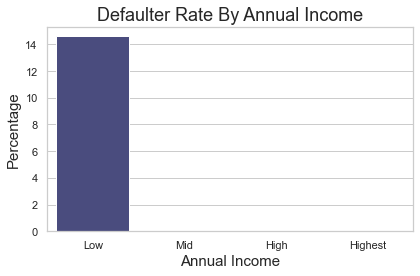

In [662]:
df_bin_annual_inc = pd.pivot_table(data=df_both,index=["bin_annual_inc"],values=["loan_status"],aggfunc=[np.mean])
df_bin_annual_inc.reset_index(inplace=True)  
df_bin_annual_inc["per"]= df_bin_annual_inc.iloc[:, 1]*100


sns.barplot(x= 'bin_annual_inc', y = 'per', data = df_bin_annual_inc, palette="viridis" )

#set labels
plt.xlabel("Annual Income", size=15)
plt.ylabel("Percentage", size=15)
plt.title("Defaulter Rate By Annual Income", size=18)
plt.tight_layout()
plt.show()

#### Default Rate versus Debt to Income 

**Note** :Lower annual income leads to higher defaulting rate

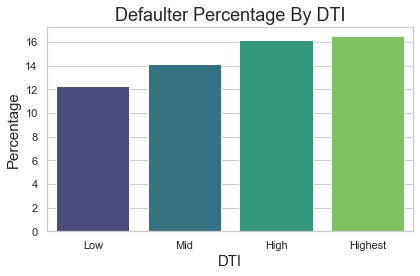

In [663]:
bin_dti = pd.pivot_table(data=df_both,index=["bin_dti"],values=["loan_status"],aggfunc=[np.mean])
bin_dti.reset_index(inplace=True)  
bin_dti["per"]= bin_dti.iloc[:, 1]*100


sns.barplot(x='bin_dti', y = 'per', data = bin_dti, palette="viridis" )

#set labels
plt.xlabel("DTI", size=15)
plt.ylabel("Percentage", size=15)
plt.title("Defaulter Percentage By DTI", size=18)
plt.tight_layout()
plt.show()

**Note** : Higher Debt to income leads to higher defaults

#### Default Rate versus Interest Rate

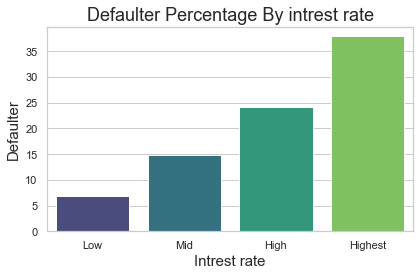

In [664]:
bin_int_rate = pd.pivot_table(data=df_both,index=["bin_int_rate"],values=["loan_status"],aggfunc=[np.mean])
bin_int_rate.reset_index(inplace=True)  
bin_int_rate["per"]= bin_int_rate.iloc[:, 1]*100

sns.barplot(x='bin_int_rate', y = 'per', data = bin_int_rate, palette="viridis" )

#set labels
plt.xlabel("Intrest rate", size=15)
plt.ylabel("Defaulter", size=15)
plt.title("Defaulter Percentage By intrest rate", size=18)
plt.tight_layout()
plt.show()

**Note** : Loans with higher intrest rate leads to defaulting

#### Default Rate versus Loan Amount

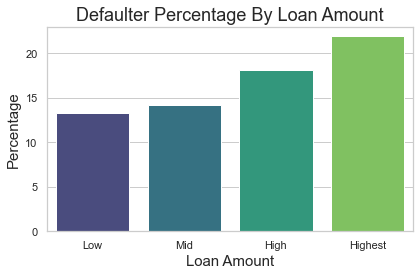

In [665]:
bin_loan_amnt = pd.pivot_table(data=df_both,index=["bin_loan_amnt"],values=["loan_status"],aggfunc=[np.mean])
bin_loan_amnt.reset_index(inplace=True)  
bin_loan_amnt["per"]= bin_loan_amnt.iloc[:, 1]*100

sns.barplot(x= 'bin_loan_amnt', y = 'per', data = bin_loan_amnt, palette="viridis" )

#set labels
plt.xlabel("Loan Amount", size=15)
plt.ylabel("Percentage", size=15)
plt.title("Defaulter Percentage By Loan Amount", size=18)
plt.tight_layout()
plt.show()

**Note** : When the loan amount is high the defaulting rate is also higher

#### Bivariate Analysis



In [666]:
purpose_df = df_both[df_both.purpose.isin(['small_business', 'debt_consolidation','home_improvement','others'])]


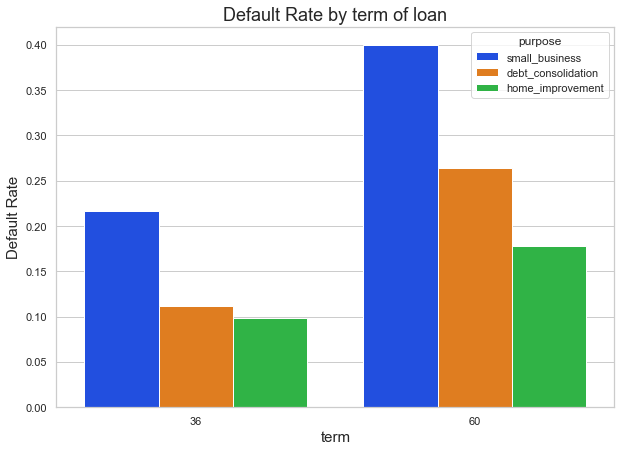

<Figure size 720x504 with 0 Axes>

In [667]:
plt.figure(figsize=[10, 7])

plot = sns.barplot(x="term", y="loan_status", hue='purpose',data=purpose_df, ci=None, palette="bright")
plt.xlabel("term", size=15)
plt.ylabel("Default Rate", size=15)
plt.title("Default Rate by term of loan" , size=18)

plt.figure(figsize=[10, 7])

plt.tight_layout()
plt.show()

**Note** : Small business seems to be defaulting at both the loan terms

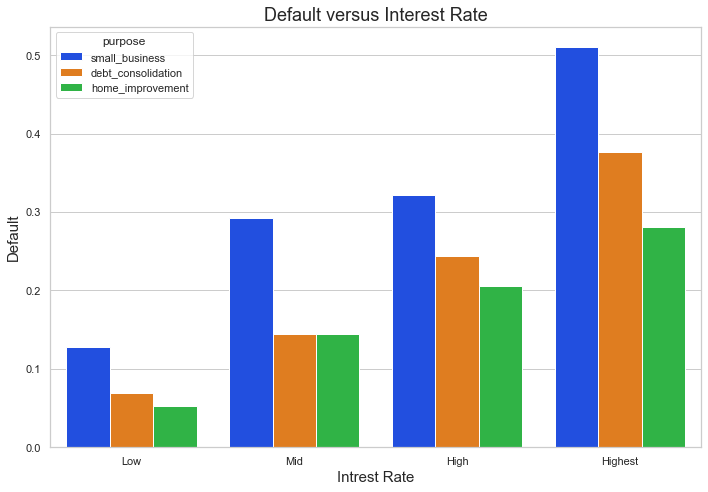

In [668]:
plt.figure(figsize=[10, 7])

plot = sns.barplot(x="bin_int_rate", y="loan_status", hue='purpose',data=purpose_df, ci=None, palette="bright")
plt.xlabel("Intrest Rate", size=15)
plt.ylabel("Default", size=15)
plt.title("Default versus Interest Rate" , size=18)

plt.tight_layout()
plt.show()

**Note** : Small business has highest default rate when Intrest rate is taken into account

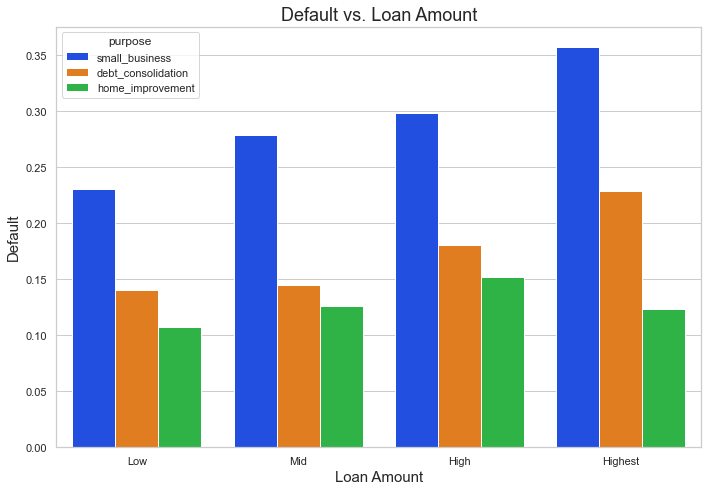

In [669]:
plt.figure(figsize=[10, 7])

plot = sns.barplot(x="bin_loan_amnt", y="loan_status", hue='purpose',data=purpose_df, ci=None, palette="bright")
plt.xlabel("Loan Amount", size=15)
plt.ylabel("Default", size=15)
plt.title("Default vs. Loan Amount" , size=18)

plt.tight_layout()
plt.show()

**Note** : Small business has highest default rate when Loan Amount is taken into account

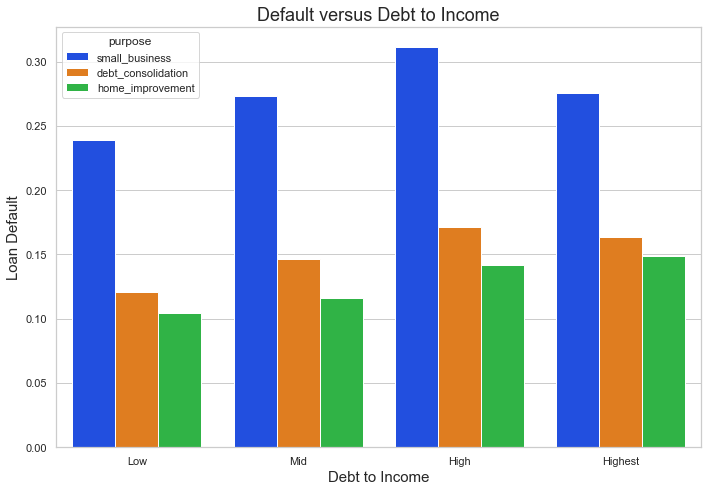

In [670]:
plt.figure(figsize=[10, 7])

plot = sns.barplot(x="bin_dti", y="loan_status", hue='purpose',data=purpose_df, ci=None, palette="bright")
plt.xlabel("Debt to Income", size=15)
plt.ylabel("Loan Default", size=15)
plt.title("Default versus Debt to Income" , size=18)

plt.tight_layout()
plt.show()

**Note** : Small business has highest default rate when Debt to income is taken into account

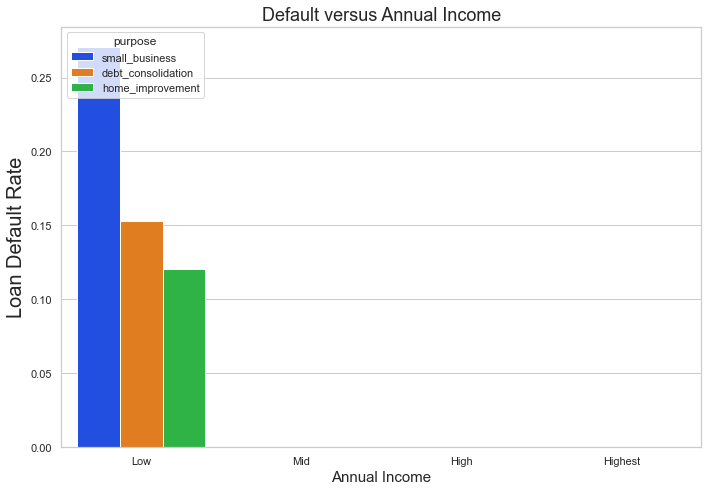

In [671]:
plt.figure(figsize=[10, 7])

plot = sns.barplot(x="bin_annual_inc", y="loan_status", hue='purpose',data=purpose_df, ci=None, palette="bright")
plt.xlabel("Annual Income", size=15)
plt.ylabel("Loan Default Rate", size=20)
plt.title("Default versus Annual Income" , size=18)

plt.tight_layout()
plt.show()

**Note** : Among low income , again Small Bussiness owners default the most

In [672]:
df_both["verification_status"].value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

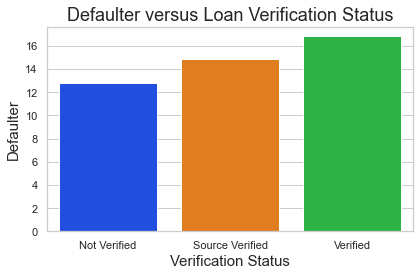

In [673]:
df_grade_pv = pd.pivot_table(data=df_both,index=["verification_status"],values=["loan_status"],aggfunc=[np.mean])
df_grade_pv.reset_index(inplace=True)  
df_grade_pv["per"]= df_grade_pv.iloc[:, 1]*100

sns.barplot(x= 'verification_status', y = 'per', data = df_grade_pv, palette="bright" )

#set labels
plt.xlabel("Verification Status", size=15)
plt.ylabel("Defaulter", size=15)
plt.title("Defaulter versus Loan Verification Status", size=18)
plt.tight_layout()
plt.show()

**Note** : Intrestingly verified loans has higher chance of defaulting